In [5]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
# Gross
import sys
sys.path.append("../..")

In [139]:
import networkx as nx

In [140]:
from encoding import parse_rooms

In [141]:
exits = parse_rooms.parse_exits("../../encoding/dsl/exits.txt")

In [142]:
rooms = parse_rooms.parse_rooms("../../encoding/dsl/rooms.txt")

In [143]:
tot = 0
for r in rooms.values():
    tot += r.graph.nnodes

In [144]:
tot

719

In [145]:
from door_rando import spoiler_graph

In [146]:
#spoiler_graph.make_spoiler_graph(exits.items(), "base")

In [154]:
rooms["Landing_Site"].graph.edges.__next__()

('Landing_Site_L1',
 <data_types.constraintgraph.ConstraintEdge at 0x76f2e88b9090>)

In [170]:
del rooms["Kraid2"]
del rooms["Phantoon2"]
del rooms["Draygon2"]
del rooms["Ridley2"]

In [171]:
full_graph = nx.Graph()
# Add within-room edges
for room in rooms.values():
    for t1, e in room.graph.edges:
        t2 = e.terminal
        full_graph.add_edge(t1, t2)
# Add between-room edges
for e1, e2 in exits.items():
    full_graph.add_edge(e1, e2)

In [172]:
spoiler_graph.miniboss_rooms

['Spore Spawn', 'Botwoon', 'Crocomire', 'Bomb Torizo', 'Golden Torizo']

In [173]:
boss_nodes = ["Ridley_Ridley", "Kraid_Kraid", "Draygon_Draygon", "Mother_Brain_Mother_Brain", "Phantoon_Phantoon"]
miniboss_nodes = ["Spore_Spawn_Spore_Spawn", "Botwoon_Botwoon", "Crocomire_Crocomire", "Bomb_Torizo_Bombs", "Golden_Torizo_Golden_Torizo"]

In [189]:
def make_spoiler_graph_full(nxg, spoiler_filename):
    # make a set of all the rooms
    rooms = set()
    for a,b in nxg.edges():
        rooms.add(a)
        rooms.add(b)
    dot = graphviz.Graph()
    for room_name in rooms:
        #node_label = room_name
        node_label = ""
        d = {}
        if room_name == "Landing_Site_L2":
            d = {"color": "blue", "style": "filled", "shape": "doubleoctagon"}
        elif room_name in boss_nodes:
            d = {"color": "red", "style": "filled", "shape": "diamond"}
        elif room_name in miniboss_nodes:
            d = {"color": "green", "style": "filled", "shape": "triangle"}
        elif room_name == "Statues_ET":
            d = {"color": "yellow", "style": "filled"}
        elif room_name == "Escape_4_R":
            d = {"color": "purple", "style": "filled"}
        dot.node(room_name, node_label, **d)
    for a, b in nxg.edges():
        dot.edge(a, b)
    dot.render(spoiler_filename + ".graph")

In [190]:
make_spoiler_graph_full(full_graph, "base_full")

In [14]:
# Get the node histogram

In [15]:
import json

In [16]:
import graphviz

In [197]:
#dotpath = "./base.graph"
dotpath = "../../../roms/rando_rom.smc.graph"

In [198]:
dot = graphviz.Source.from_file(dotpath)

In [199]:
json_string = dot.pipe("json").decode()

In [200]:
json_dict = json.loads(json_string)

In [201]:
def parse_posn(p):
    a, b = p.split(",")
    return (float(a), float(b))

In [202]:
#for obj in json_dict["objects"]:
#    print(obj["name"], obj["pos"])
obj_posns = {}
for obj in json_dict["objects"]:
    obj_posns[obj["name"]] = parse_posn(obj["pos"])

In [203]:
obj_posns["Pillars"]

(3445.0, 1068.0)

In [204]:
len(obj_posns)

234

In [205]:
json_dict["edges"][0]["_draw_"][1]["points"]

[[1221.98, 2145.61], [1242.04, 2130.66], [1271.54, 2108.66], [1291.7, 2093.63]]

In [206]:
import pydot

In [207]:
g = pydot.graph_from_dot_file(dotpath)[0]

In [208]:
def parse_node(n_str):
    if n_str[0] == '"':
        return n_str[1:-1]
    else:
        return n_str

In [209]:
done_edges = set()
edges = []
for e in g.get_edges():
    s = parse_node(e.get_source())
    d = parse_node(e.get_destination())
    ## No need to include duplicate edges for the statistics
    if (s,d) in done_edges:
        continue
    done_edges.add((s,d))
    done_edges.add((d,s))
    edges.append((s, d))
    assert s in obj_posns, s
    assert d in obj_posns, d

In [210]:
len(edges)

268

In [211]:
len(set(e[0] for e in done_edges))

234

In [212]:
len(set([e[0] for e in edges]))

174

In [213]:
def euc(p0, p1):
    return ((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)**0.5

In [214]:
# Distance Histogram
dists = []
for e0, e1 in edges:
    p0 = obj_posns[e0]
    p1 = obj_posns[e1]
    dists.append(euc(p0, p1))

In [215]:
len(edges)

268

In [216]:
# Average
sum(dists) / len(dists)
# Original: 272.31127241296633
# New: 343.3565977206133

343.3565977206133

(array([100.,  33.,  35.,  19.,   5.,  11.,   8.,   7.,   6.,   6.,   6.,
          4.,   3.,   1.,   1.,   1.,   1.,   4.,   3.,   1.,   3.,   2.,
          1.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  87.        ,  142.90706479,  198.81412958,  254.72119436,
         310.62825915,  366.53532394,  422.44238873,  478.34945351,
         534.2565183 ,  590.16358309,  646.07064788,  701.97771266,
         757.88477745,  813.79184224,  869.69890703,  925.60597182,
         981.5130366 , 1037.42010139, 1093.32716618, 1149.23423097,
        1205.14129575, 1261.04836054, 1316.95542533, 1372.86249012,
        1428.7695549 , 1484.67661969, 1540.58368448, 1596.49074927,
        1652.39781405, 1708.30487884, 1764.21194363, 1820.11900842,
        1876.02607321, 1931.93313799, 1987.84020278, 2043.74726757,
        2099.65433236, 2155.56139714, 2211.46846193, 2267.37552672,
        2323.28259151]),
 <BarContainer object

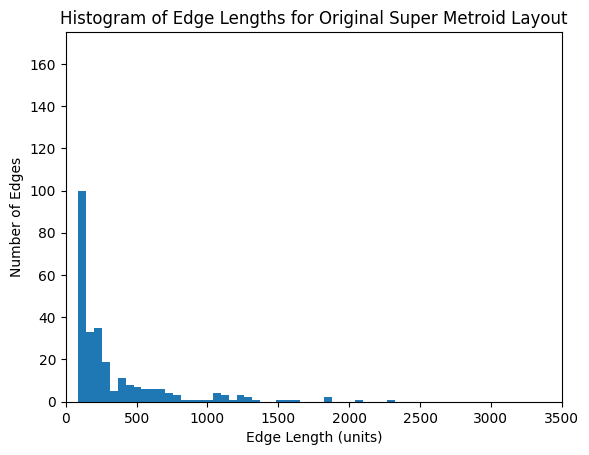

In [217]:
plt.ylabel("Number of Edges")
plt.xlabel("Edge Length (units)")
plt.title("Histogram of Edge Lengths for Original Super Metroid Layout")
plt.ylim(0, 175)
plt.xlim(0, 3500)
plt.hist(dists, bins=40)

In [218]:
# Rebuild the graphs

In [239]:
miniboss_nodes

['Spore_Spawn_Spore_Spawn',
 'Botwoon_Botwoon',
 'Crocomire_Crocomire',
 'Bomb_Torizo_Bombs',
 'Golden_Torizo_Golden_Torizo']

In [240]:
boss_rooms = ["Kraid", "Ridley", "Mother Brain", "Draygon", "Phantoon"]
miniboss_rooms = ["Spore_Spawn", "Botwoon", "Golden Torizo", "Crocomire", "Bomb Torizo"]

In [249]:
def make_spoiler_nx(nxg, spoiler_filename):
    # make a set of all the rooms
    rooms = set()
    for a,b in nxg.edges():
        rooms.add(a)
        rooms.add(b)
    dot = graphviz.Graph()
    for room_name in rooms:
        #print(room_name)
        node_label = ""
        d = {}
        if room_name == "Landing Site":
            d = {"color": "blue", "style": "filled", "shape": "doubleoctagon"}
        elif room_name in boss_rooms:
            d = {"color": "red", "style": "filled", "shape": "diamond"}
        elif room_name in miniboss_rooms:
            d = {"color": "green", "style": "filled", "shape": "triangle"}
        elif room_name == "Statues":
            d = {"color": "yellow", "style": "filled"}
        elif room_name == "Escape 4":
            d = {"color": "purple", "style": "filled"}
        dot.node(room_name, node_label, **d)
    for a, b in nxg.edges():
        dot.edge(a, b)
    dot.render(spoiler_filename + ".graph")

In [250]:
# Compute average shortest path length

In [251]:
def convert_pydot_to_nx(pydot):
    g = nx.Graph()
    for edge in pydot.get_edges():
        s,d = (parse_node(edge.get_source()), parse_node(edge.get_destination()))
        #print(s,d)
        g.add_edge(s,d)
    return g

In [252]:
# Remove Ceres Station and Tourian, then create an edge linking Statues to Escape 4
tourian = ["Tourian Elevator", "Tourian Save", "Metroid 1", "Metroid 2", "Metroid 3", "Metroid 4", "Blue Hoppers", "RIP Torizo", "Metroid Skip", "Seaweed Room", "Tourian Refill", "Tourian Eye Door", "Rinka Shaft", "Mother Brain Save", "Mother Brain", "Escape 1", "Escape 2", "Escape 3"]
ceres = ["Ceres Entrance", "Ceres 1", "Ceres 2", "Ceres 3", "Ceres 4", "Ceres Ridley"]
def fixup_graph(g):
    for r in tourian + ceres:
        if r in g:
            g.remove_node(r)
            print("removed")
    g.add_edge("Statues", "Escape 4")

In [253]:
nxg = convert_pydot_to_nx(g)
fixup_graph(nxg)

In [254]:
# 12.66 (Original)
# 7.84 (Randomized)
nx.average_shortest_path_length(nxg)

7.839697736693445

In [255]:
# Redraw the graph
make_spoiler_nx(nxg, "rando_nx")